In [1]:
# Sbi
import sbi
from sbi import utils as utils
from sbi.inference import SNLE, simulate_for_sbi

# Sbi benchmark
import sbibm
from sbibm.metrics import c2st

# torch and so
import torch
from torch import nn
import torch.distributions as distrib
import numpy as np

# Pyro thinks
import pyro
from pyro.distributions import transforms
from pyro.optim import Adam
from pyro.nn import AutoRegressiveNN, DenseNN

import matplotlib.pyplot as plt

from scripts.alternative_divergence import ElboOptimizer, RenjeyDivergenceOptimizer, TailAdaptivefDivergenceOptimizer

In [4]:
task = sbibm.get_task("slcp") 
prior = task.prior_dist
simulator = task.get_simulator()
observation = task.get_observation(num_observation=1) 

thetas = prior.sample((10000,))
xs = simulator(thetas)


inf = sbi.inference.SNLVI(prior)
density_estimator = inf.append_simulations(thetas, xs).train(max_num_epochs=0)
state_dict = torch.load("likelihood_models/slcp.net")
density_estimator = inf._neural_net
density_estimator.load_state_dict(state_dict())

<All keys matched successfully>

<All keys matched successfully>

In [5]:
posterior = inf.build_posterior(density_estimator, num_flows=6)
posterior.set_default_x(observation)

VariationalPosterior(
               method_family=snle,
               net=<a Flow, see `.net` for details>,
               prior=Independent(Uniform(low: torch.Size([5]), high: torch.Size([5])), 1),
               x_shape=torch.Size([1, 8]))
               

In [30]:
posterior.train(loss="renjey_divergence", alpha=0.3, n_particles=1024)

Loss: 23.06: 100%|██████████| 2000/2000 [04:27<00:00,  7.47it/s]


c:\users\manuel glöckler\onedrive\uni\master thesis\sbi\sbi\utils\plot.py:181: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  "Importing `pairplot` from `sbi.utils` is deprecated since sbi "


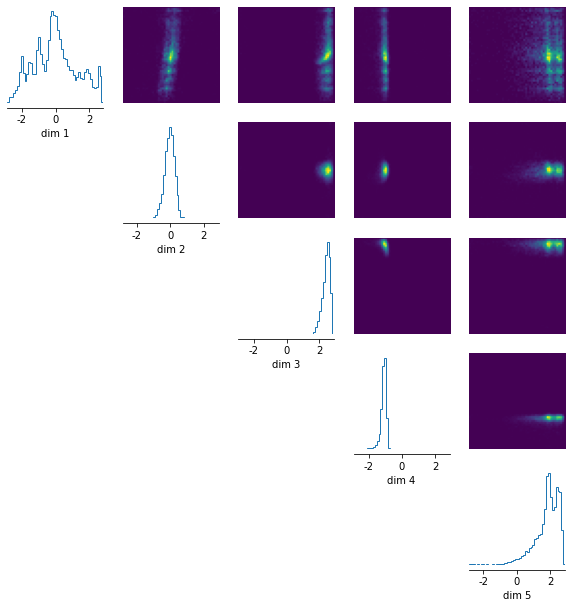

In [31]:
from sbi.utils import pairplot
samples = posterior.sample((10000,))
_ = pairplot(samples)

('self', 'posterior', 'n_particles', 'clip_value', 'optimizer', 'kwargs')

In [10]:
iters = tqdm(range(201))
for i in iters:
    loss = optimizer.step(observation)
    iters.set_description("Loss: " + str(np.round(loss.numpy(),2)))

NameError: name 'tqdm' is not defined

In [35]:
posterior.q = build_flow(posterior._prior, permute=True, type="spline_autoregressive", num_flows=10)
opt = ElboOptimizer(posterior, elbo_particles=512, optimizer=torch.optim.Adam)

In [36]:
for i in range(1000):
    loss = opt.step(moons_observation)
    print(loss)

tensor(582.8143)
tensor(429.0032)
tensor(305.4998)
tensor(325.7170)
tensor(293.7069)
tensor(247.5262)
tensor(212.7248)
tensor(159.3085)
tensor(151.9764)
tensor(178.6175)
tensor(123.4243)
tensor(134.0513)
tensor(128.8916)
tensor(125.5855)
tensor(104.3161)
tensor(98.7571)
tensor(99.9736)
tensor(75.4172)
tensor(80.7968)
tensor(81.6634)
tensor(81.9627)
tensor(81.9066)
tensor(70.5426)
tensor(73.3274)
tensor(66.0860)
tensor(83.4469)
tensor(80.9769)
tensor(65.8217)
tensor(57.5438)
tensor(52.0046)
tensor(53.5733)
tensor(50.7880)
tensor(63.0830)
tensor(52.3422)
tensor(78.7777)
tensor(47.4226)
tensor(62.8542)
tensor(51.0352)
tensor(44.3492)
tensor(46.5288)
tensor(47.5160)
tensor(42.4940)
tensor(49.7791)
tensor(48.9329)
tensor(44.5055)
tensor(56.8879)
tensor(48.4146)
tensor(40.9006)
tensor(50.4744)
tensor(60.0887)
tensor(60.0442)
tensor(71.7723)
tensor(72.8266)
tensor(61.9488)
tensor(55.0258)
tensor(44.3648)
tensor(57.2916)
tensor(50.3757)
tensor(52.1478)
tensor(39.5695)
tensor(53.7639)
tensor(43

c:\users\manuel glöckler\onedrive\uni\master thesis\sbi\sbi\utils\plot.py:181: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  "Importing `pairplot` from `sbi.utils` is deprecated since sbi "


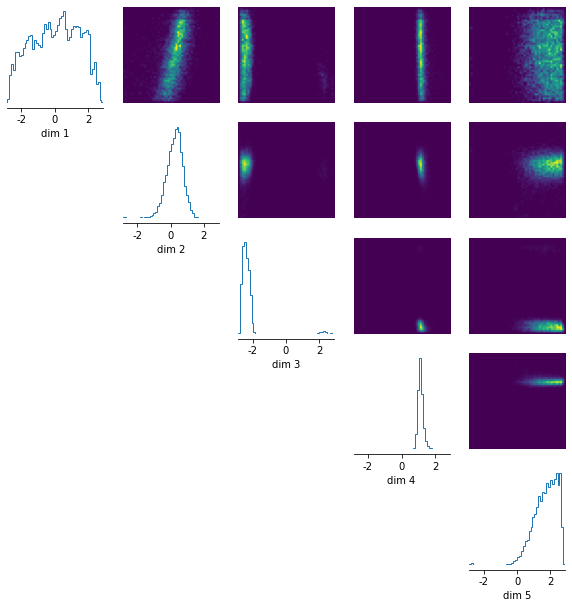

In [37]:
from sbi.utils import pairplot
samples = posterior.sample((10000,))
_ = pairplot(samples)

In [50]:
posterior.q = build_flow(posterior._prior, permute=True, type="spline_autoregressive", num_flows=10)
opt = RenjeyDivergenceOptimizer(posterior, alpha=0.5, elbo_particles=512, optimizer=torch.optim.Adam)

In [52]:
for i in range(1000):
    loss = opt.step_surrogated(observation)
    print(loss)

tensor(29.3241)
tensor(31.3056)
tensor(28.2672)
tensor(29.5443)
tensor(30.4057)
tensor(29.9483)
tensor(29.5614)
tensor(28.2463)
tensor(26.8990)
tensor(26.9728)
tensor(28.0051)
tensor(28.7574)
tensor(29.2317)
tensor(27.4770)
tensor(27.8325)
tensor(29.8695)
tensor(28.3448)
tensor(26.8116)
tensor(27.9178)
tensor(27.7541)
tensor(25.3979)
tensor(26.8260)
tensor(26.1727)
tensor(26.2981)
tensor(27.0366)
tensor(25.9072)
tensor(25.8403)
tensor(24.7941)
tensor(26.4356)
tensor(25.9630)
tensor(26.2990)
tensor(26.6638)
tensor(26.3238)
tensor(25.5877)
tensor(24.7824)
tensor(25.6727)
tensor(25.7059)
tensor(25.6796)
tensor(25.5691)
tensor(25.0355)
tensor(25.6473)
tensor(25.5166)
tensor(24.1990)
tensor(24.1863)
tensor(25.0765)
tensor(25.1037)
tensor(24.6269)
tensor(25.1019)
tensor(24.0107)
tensor(25.0556)
tensor(24.7121)
tensor(24.5382)
tensor(24.7421)
tensor(25.0027)
tensor(24.4630)
tensor(23.7389)
tensor(23.7298)
tensor(24.2512)
tensor(24.0601)
tensor(23.8423)
tensor(23.7363)
tensor(23.9278)
tensor(2

KeyboardInterrupt: 

c:\users\manuel glöckler\onedrive\uni\master thesis\sbi\sbi\utils\plot.py:181: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  "Importing `pairplot` from `sbi.utils` is deprecated since sbi "


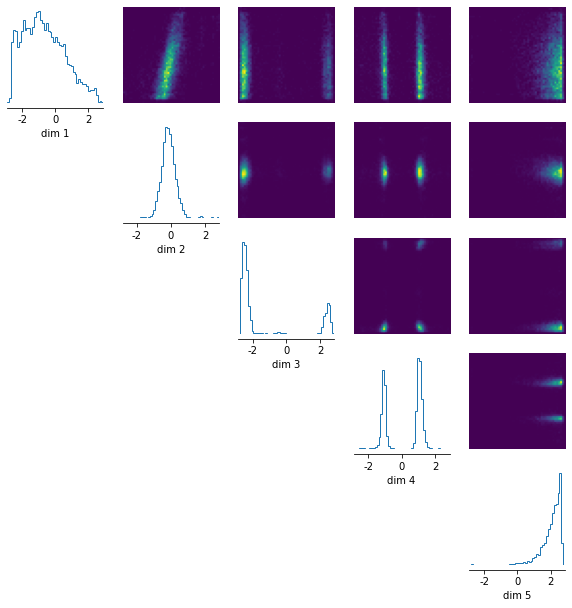

In [53]:
from sbi.utils import pairplot
samples = posterior.sample((10000,))
_ = pairplot(samples)